In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,  roc_curve, roc_auc_score, precision_recall_curve, auc

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from scipy.spatial import distance
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from hyperopt import hp, tpe, Trials, fmin,space_eval
import graphviz
from IPython.display import display


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, tpe, fmin

import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('USDCOP_df.csv', index_col='date')
df.head()

,USTVOL,BEI,JPYRR,GDPNOW,FINCON,OIL,ECOSURP,USTR,SPXPOS,USTPOS,DXYPOS,AAII,USDCOP_4,USDCOP_8,USDCOP_16,USDCOP_32,USDCOP_64,R4WUSDCOP
date,,,,,,,,,,,,,,,,,,
2011-09-14,-1.572940,-0.055558,-0.651098,1.798196,0.245111,-1.097728,1.856571,0.488889,0.311000,0.834344,0.444165,-1.585113,1.000000,1.000000,1.000000,1.000000,1.000000,1
2011-09-21,-0.387444,-0.461233,0.164507,0.004356,0.056102,-1.093142,-0.389744,-1.021998,-1.598593,1.165909,0.233943,0.110896,1.000000,1.000000,1.000000,1.000000,1.000000,1
2011-09-28,2.531801,0.568746,0.257632,-0.062650,-0.018103,-0.158808,-0.203011,1.969365,0.435989,-0.680475,-0.234681,-0.592135,1.000000,1.000000,1.000000,1.000000,1.000000,0
2011-10-05,0.334144,-0.331461,0.166958,0.266176,-0.147084,0.233917,1.239351,-0.640622,-0.169199,-0.374285,-0.139999,0.852070,0.577819,0.760697,0.861510,0.889861,0.904025,0
2011-10-12,-0.414408,1.524823,1.084317,-0.375892,-0.280339,1.392025,-0.053101,1.563207,-0.081087,0.277890,0.087266,0.398273,0.000000,0.000000,0.288266,0.573790,0.628602,1


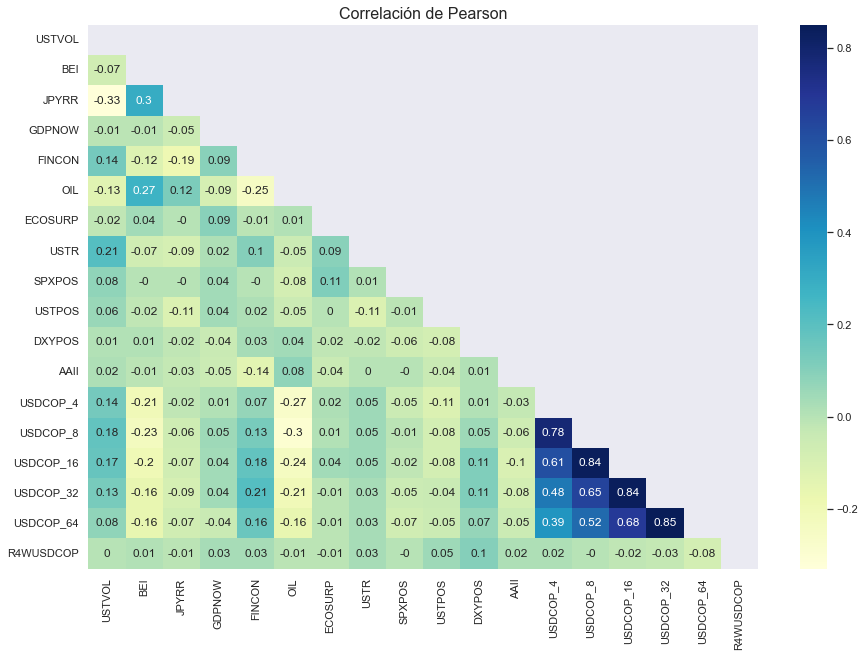

In [3]:
#Correlación de Pearson
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
corr_df = df.corr(method='pearson').round(2)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlGnBu',annot_kws={"size":12}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Pearson', fontsize=16)
plt.show()

0    0.522727
1    0.477273
Name: R4WUSDCOP, dtype: float64


<AxesSubplot:xlabel='R4WUSDCOP', ylabel='count'>

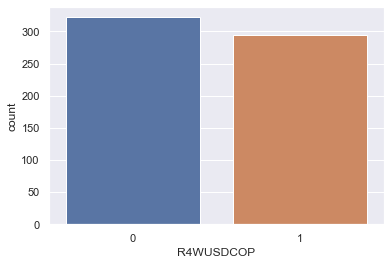

In [4]:
print(df.R4WUSDCOP.value_counts() / df.R4WUSDCOP.value_counts().sum())
sns.countplot( x = 'R4WUSDCOP', data = df)

In [5]:
# Dividir los datos en entrenamiento y testeo
X = df.drop('R4WUSDCOP', axis = 1)
y = df.R4WUSDCOP

names = X.columns

Ntest = 100

X_train = X.iloc[:-Ntest]
X_test = X.iloc[-Ntest:]

y_train = y.iloc[:-Ntest]
y_test = y.iloc[-Ntest:]

print(X_train.shape)
print(X_test.shape)


(516, 17)
(100, 17)


# Regresión Logística

Testing accuracy train = 0.5406976744186046
Testing accuracy  test= 0.51


[0.50961538 0.41747573 0.48543689 0.50485437 0.45631068]
Mediana 0.4854
Media 0.4747
Min 0.4175
Max 0.5096
-------------------------------------------------------------------------------------------------------------
Best estimador: {'solver': 'liblinear', 'penalty': 'l1', 'C': 2.993993993993994}
Testing accuracy train = 0.5348837209302325
Testing accuracy  test= 0.49


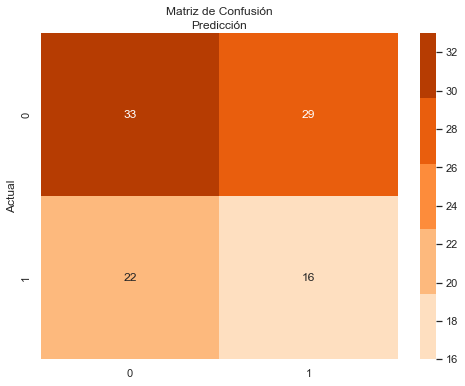

-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.53      0.56        62
           1       0.36      0.42      0.39        38

    accuracy                           0.49       100
   macro avg       0.48      0.48      0.47       100
weighted avg       0.51      0.49      0.50       100



In [6]:
random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
           'C': np.linspace(0,3,1000),
           "solver": ["liblinear", "sag", "saga"]}
cv = StratifiedKFold(n_splits=5,shuffle = False)
Logist = LogisticRegression()
Logist.fit(X_train, y_train)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)
print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')
print("-------------------------------------------------------------------------------------------------------------")

Logist = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Oranges", n_colors=5)
sns.heatmap(cnf_matrix, annot=True, cmap=colors, fmt='g')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión')
plt.show()
print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

# Obtener los coeficientes y la importancia de las variables

In [7]:
coefficients = np.abs(Logist.best_estimator_.coef_[0])
importance = coefficients / np.sum(coefficients)

impvariables = pd.DataFrame()

impvariables['Variable'] = names

impvariables['Importancia'] = importance
impvariables.sort_values('Importancia', ascending = False)

,Variable,Importancia
16,USDCOP_64,0.245810
10,DXYPOS,0.209313
4,FINCON,0.117537
12,USDCOP_4,0.096441
9,USTPOS,0.070161
15,USDCOP_32,0.066548
7,USTR,0.046278
5,OIL,0.042535
1,BEI,0.040394
6,ECOSURP,0.020335


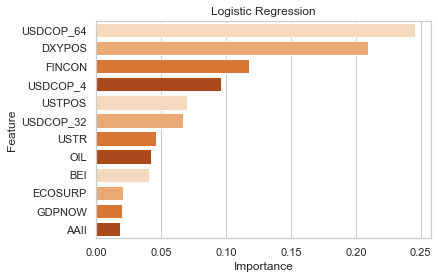

In [8]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0.01]
impvariables.sort_values('Importancia', ascending = False, inplace = True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Logistic Regression');

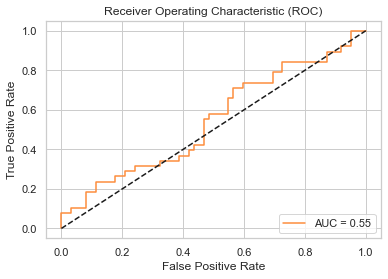

In [9]:
# Obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba = Logist.predict_proba(X_test)[:, 1]

# Calcular el valor de AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Crear el gráfico de la curva ROC con colores personalizados
colors = sns.color_palette("Oranges", n_colors=1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=colors[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [10]:
# Definir la función objetivo para la optimización bayesiana
def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok', 'params': params}

In [11]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 100)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(2,10))
}

In [12]:
trials = Trials()  
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1000, trials=trials)


  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [02:24<00:00,  6.94trial/s, best loss: -0.62]


In [13]:
losses = [trial['result']['loss'] for trial in trials.trials]

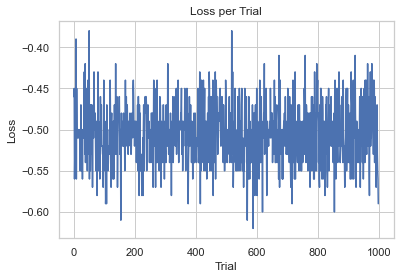

In [14]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.title('Loss per Trial')
plt.show()

In [15]:
best_params = space_eval(space, best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 10}


In [16]:
# Crear un modelo Random Forest con los hiperparámetros optimizados
modelo = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'])

In [17]:
# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)

In [18]:
# Obtener la precisión promedio en la validación cruzada
mean_accuracy = np.mean(cv_scores)
mean_accuracy

0.4649365197908887

In [19]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=10)

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Calcular Accuracy
print('Accuracy:', np.mean(y_pred == y_test))

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión: {:.4f}".format(precision))

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.4f}".format(recall))

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.4f}".format(f1))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.4f}".format(mse))

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC (ROC-AUC): {:.4f}".format(roc_auc))

Accuracy: 0.46
Precisión: 0.3667
Recall: 0.5789
F1-score: 0.4490
Error cuadrático medio (MSE): 0.5400
Área bajo la curva ROC (ROC-AUC): 0.5025


In [21]:
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47        62
           1       0.37      0.58      0.45        38

    accuracy                           0.46       100
   macro avg       0.48      0.48      0.46       100
weighted avg       0.51      0.46      0.46       100



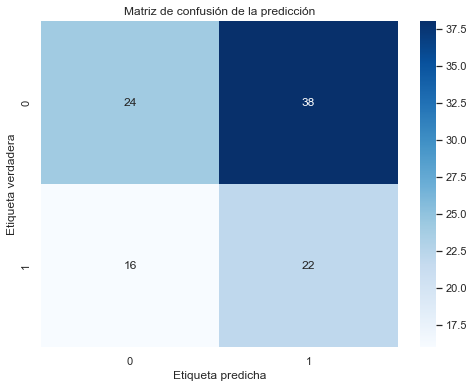

In [22]:
# Crear la matriz de confusión con datos de prueba
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title('Matriz de confusión de la predicción')
plt.show()

## Importancia de las Variables

In [23]:
# Obtener la importancia de las variables
importances = modelo.feature_importances_

# Obtener los nombres de las variables
feature_names = X.columns

# Crear un DataFrame con las importancias y los nombres de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar las variables por importancia descendente
importance_df = importance_df.sort_values('Importancia', ascending=False)

print(importance_df)


     Variable  Importancia
3      GDPNOW     0.085982
16  USDCOP_64     0.081608
4      FINCON     0.079382
10     DXYPOS     0.079240
5         OIL     0.072503
1         BEI     0.070252
15  USDCOP_32     0.067876
7        USTR     0.065995
6     ECOSURP     0.062976
14  USDCOP_16     0.059061
0      USTVOL     0.056621
2       JPYRR     0.055951
9      USTPOS     0.046647
8      SPXPOS     0.041448
11       AAII     0.032241
13   USDCOP_8     0.024270
12   USDCOP_4     0.017945


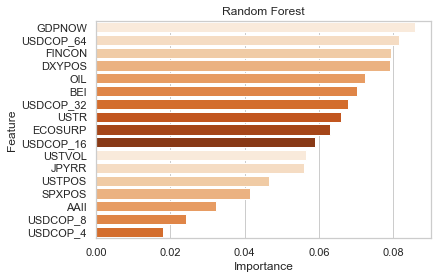

In [24]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = importance_df[importance_df.Importancia > 0]

colors = sns.color_palette("Oranges", n_colors=10)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Random Forest');

## Sesgo y Varianza

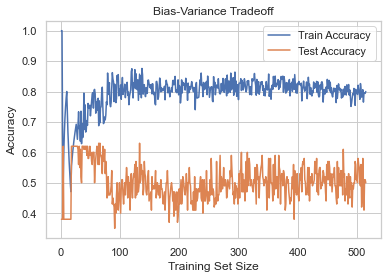

In [25]:
# Inicializar las listas para almacenar las precisiones
train_accuracies = []
test_accuracies = []


# Definir el rango de tamaños de conjunto de entrenamiento
train_sizes = np.arange(1, len(X_train))

# Calcular la precisión para diferentes tamaños de conjunto de entrenamiento
for train_size in train_sizes:
    # Ajustar el modelo Random Forest con los mejores hiperparámetros encontrados
    model = RandomForestClassifier(**best_params)
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calcular la precisión del conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train[:train_size])
    train_accuracy = accuracy_score(y_train[:train_size], train_pred)
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Almacenar las precisiones del conjunto de entrenamiento y prueba
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar las precisiones en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

# XG Boost

In [26]:
def metricas(y_test,y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cnf = confusion_matrix(y_test, y_pred)
    fig,ax=plt.subplots(figsize=(8,6))
    sns.heatmap(cnf,annot=True,cmap='Blues_r',fmt='g',)
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title('Matriz de confusión')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(classification_report(y_test, y_pred > 0.5))
    print("Confusion Matrix:")

def AUC(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Grafica la curva ROC
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [27]:
# Default parameters
Dparams = {
    'booster': 'gbtree', 
    'verbosity': 1, # Verbosity of printing messages. 1 is warning messages.
    'objective': 'binary:logistic', # Classification task
    'subsample': 1, # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 
    'colsample_bytree': 1, # Is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'eta': 0.3, # Step size shrinkage used in update to prevents overfitting. Shrinks the feature weights to make the boosting process more conservative.
    'max_depth': 6, # Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.
    'eval_metric': ['logloss','error','auc'],
    'seed': 42} # for reproducible results

In [28]:
# Utilizando la librería XGBoost y los paramétros por default
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(Dparams, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, 
                      verbose_eval = 10
                      )

[0]	train-logloss:0.64914	train-error:0.31589	train-auc:0.74575	test-logloss:0.69632	test-error:0.50000	test-auc:0.56388
[10]	train-logloss:0.34749	train-error:0.03488	train-auc:0.99369	test-logloss:0.75417	test-error:0.44000	test-auc:0.58192
[20]	train-logloss:0.18364	train-error:0.00194	train-auc:1.00000	test-logloss:0.81610	test-error:0.49000	test-auc:0.59338
[30]	train-logloss:0.11173	train-error:0.00000	train-auc:1.00000	test-logloss:0.89031	test-error:0.51000	test-auc:0.56070
[40]	train-logloss:0.07626	train-error:0.00000	train-auc:1.00000	test-logloss:0.92560	test-error:0.47000	test-auc:0.56749
[50]	train-logloss:0.05360	train-error:0.00000	train-auc:1.00000	test-logloss:0.95090	test-error:0.51000	test-auc:0.57003
[57]	train-logloss:0.04492	train-error:0.00000	train-auc:1.00000	test-logloss:1.00962	test-error:0.53000	test-auc:0.55263


In [29]:
y_pred1 = xgb_model.predict(dtest)
y_pred_rounded = np.round(y_pred1)

Precision: 0.38461538461538464
Recall: 0.6578947368421053
F1-score: 0.4854368932038836
              precision    recall  f1-score   support

           0       0.63      0.35      0.45        62
           1       0.38      0.66      0.49        38

    accuracy                           0.47       100
   macro avg       0.51      0.51      0.47       100
weighted avg       0.54      0.47      0.47       100

Confusion Matrix:


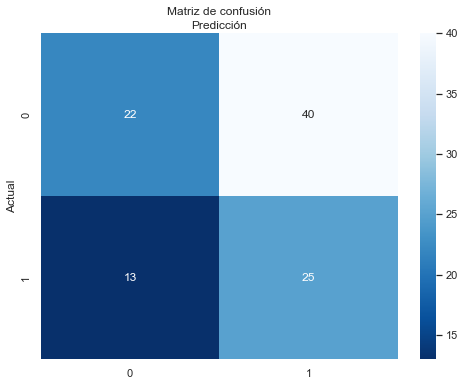

In [30]:
metricas(y_test, y_pred_rounded)

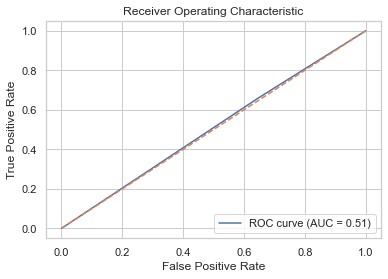

In [31]:
AUC(y_test, y_pred_rounded)

## Optimización de Hiperparámetros

In [32]:
# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta',0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [33]:
# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok'}

In [34]:

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
    )

100%|██████████| 1000/1000 [03:22<00:00,  4.95trial/s, best loss: -0.63]


In [35]:
best_params

{'colsample_bytree': 0.8157950692701887,
 'eta': 0.43951003638178165,
 'max_depth': 6.0,
 'n_estimators': 57.0,
 'subsample': 0.6452082464945427}

In [36]:
# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss','error','auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.61483	validation_0-error:0.30233	validation_0-auc:0.76724	validation_1-logloss:0.71015	validation_1-error:0.48000	validation_1-auc:0.52907
[1]	validation_0-logloss:0.56755	validation_0-error:0.23643	validation_0-auc:0.83459	validation_1-logloss:0.73455	validation_1-error:0.48000	validation_1-auc:0.51188
[2]	validation_0-logloss:0.52529	validation_0-error:0.19380	validation_0-auc:0.86617	validation_1-logloss:0.73565	validation_1-error:0.43000	validation_1-auc:0.54011
[3]	validation_0-logloss:0.48171	validation_0-error:0.15891	validation_0-auc:0.89470	validation_1-logloss:0.73317	validation_1-error:0.49000	validation_1-auc:0.55815
[4]	validation_0-logloss:0.45489	validation_0-error:0.15310	validation_0-auc:0.91439	validation_1-logloss:0.75189	validation_1-error:0.49000	validation_1-auc:0.54499
[5]	validation_0-logloss:0.40759	validation_0-error:0.12597	validation_0-auc:0.94289	validation_1-logloss:0.74158	validation_1-error:0.45000	validation_1-auc:0.57937
[6]	

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8157950692701887, early_stopping_rounds=None,
              enable_categorical=False, eta=0.43951003638178165,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=57, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

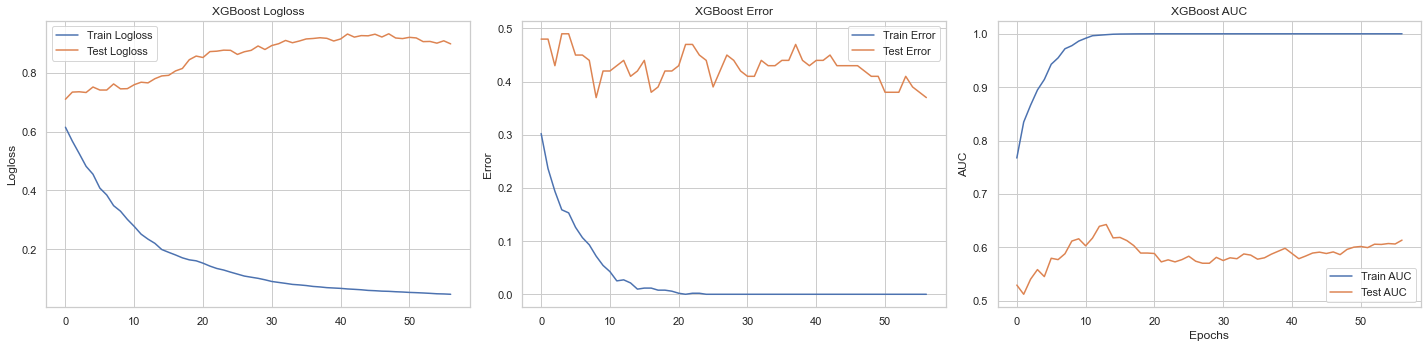

In [37]:
results = final_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.5094339622641509
Recall: 0.7105263157894737
F1-score: 0.5934065934065935
              precision    recall  f1-score   support

           0       0.77      0.58      0.66        62
           1       0.51      0.71      0.59        38

    accuracy                           0.63       100
   macro avg       0.64      0.65      0.63       100
weighted avg       0.67      0.63      0.64       100

Confusion Matrix:


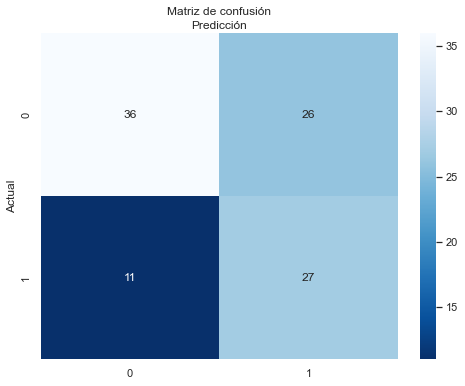

In [38]:
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

metricas(y_test,y_pred)

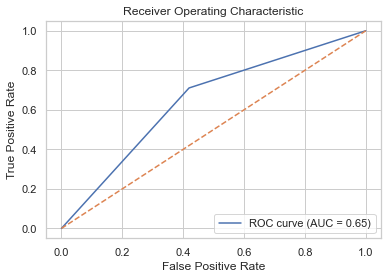

In [39]:
AUC(y_test, y_pred)

## Optimización de max_depth y n_estimators

In [40]:
# Espacio de búsqueda de hiperparámetros
space2 = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [41]:
# Función objetivo para optimización
def objective2(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        n_estimators=int(params['n_estimators']),
        colsample_bytree = 0.85,
        eta=0.1,
        subsample=0.8,     
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred3 = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred3)
    return {'loss': -accuracy, 'status': 'ok'}

In [42]:
# Optimización de parámetros
best_params3 = fmin(
    fn=objective2,
    space=space2,
    algo=tpe.suggest,
    max_evals=1000,
    )

100%|██████████| 1000/1000 [03:19<00:00,  5.02trial/s, best loss: -0.54]


In [43]:
best_params3

{'max_depth': 9.0, 'n_estimators': 15.0}

In [44]:
# Entrenar el modelo con los mejores parámetros encontrados
xgb_final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params3['n_estimators']),
    max_depth=int(best_params3['max_depth']),
    subsample=0.8,
    colsample_bytree=0.85,
    eta=0.1,
    eval_metric=['logloss','error','auc'],
    random_state=42
)
xgb_final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.66215	validation_0-error:0.23256	validation_0-auc:0.81472	validation_1-logloss:0.69503	validation_1-error:0.48000	validation_1-auc:0.52313
[1]	validation_0-logloss:0.63454	validation_0-error:0.17829	validation_0-auc:0.91019	validation_1-logloss:0.68620	validation_1-error:0.50000	validation_1-auc:0.59041
[2]	validation_0-logloss:0.60736	validation_0-error:0.12016	validation_0-auc:0.95673	validation_1-logloss:0.68742	validation_1-error:0.46000	validation_1-auc:0.58128
[3]	validation_0-logloss:0.57766	validation_0-error:0.07364	validation_0-auc:0.98528	validation_1-logloss:0.69041	validation_1-error:0.46000	validation_1-auc:0.54881
[4]	validation_0-logloss:0.55450	validation_0-error:0.04457	validation_0-auc:0.99153	validation_1-logloss:0.68952	validation_1-error:0.49000	validation_1-auc:0.57088
[5]	validation_0-logloss:0.52848	validation_0-error:0.02519	validation_0-auc:0.99677	validation_1-logloss:0.69328	validation_1-error:0.48000	validation_1-auc:0.57598
[6]	

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

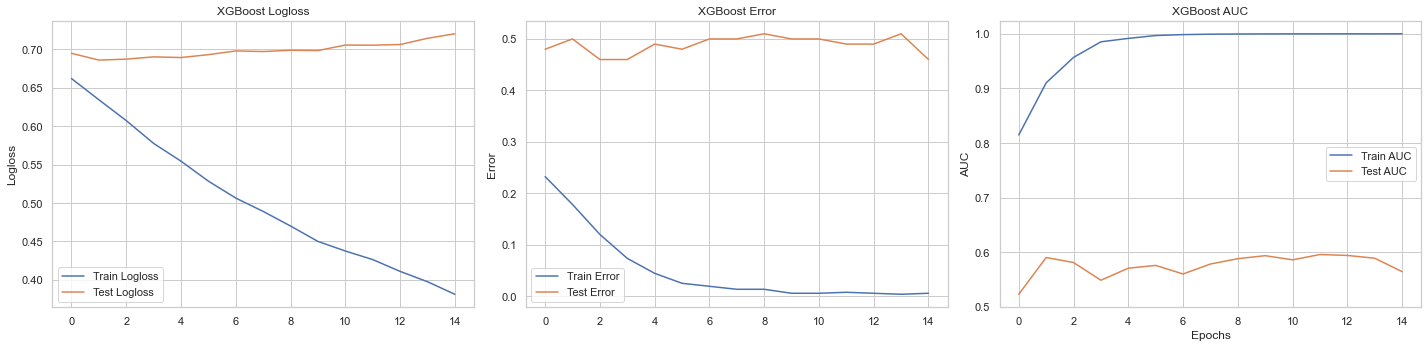

In [45]:
results2 = xgb_final_model.evals_result()
epochs2 = len(results2['validation_0']['logloss'])
x_axis = range(0, epochs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results2['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results2['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results2['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results2['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results2['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results2['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.4375
Recall: 0.7368421052631579
F1-score: 0.5490196078431372
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        62
           1       0.44      0.74      0.55        38

    accuracy                           0.54       100
   macro avg       0.58      0.58      0.54       100
weighted avg       0.61      0.54      0.54       100

Confusion Matrix:


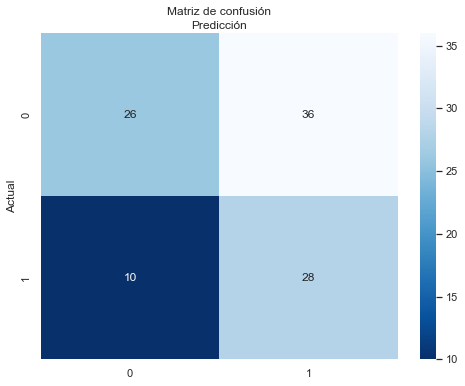

In [46]:
y_pred_n = xgb_final_model.predict(X_test)
y_pred_n = np.round(y_pred_n)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular las métricas
metricas(y_test, y_pred_n)

## Optimización de Hiperparámetros con Cross-Validation

In [47]:
# Definir espacio de búsqueda de hiperparámetros
spaceCV = {
    'max_depth': [int(i) for i in range(1,10)],
    'subsample': [i for i in np.arange(0.1,1,0.1)],
    'colsample_bytree': [i for i in np.arange(0.1,1,1)],
    'eta': [i for i in np.arange(0.01,0.1,0.1)]
}

In [48]:
# Crear un objeto XGBoost Classifier
xgb_model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic')

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=spaceCV, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros y validación cruzada
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_paramsCV = grid_search.best_params_

# Entrenar el modelo final con los mejores hiperparámetros encontrados
final_modelCV = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', **best_paramsCV)
final_modelCV.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [49]:
best_paramsCV

{'colsample_bytree': 0.1, 'eta': 0.01, 'max_depth': 8, 'subsample': 0.9}

Testing accuracy  test= 0.51
Precision: 0.4067796610169492
Recall: 0.631578947368421
F1-score: 0.4948453608247423
              precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.41      0.63      0.49        38

    accuracy                           0.51       100
   macro avg       0.53      0.53      0.51       100
weighted avg       0.56      0.51      0.51       100

Confusion Matrix:


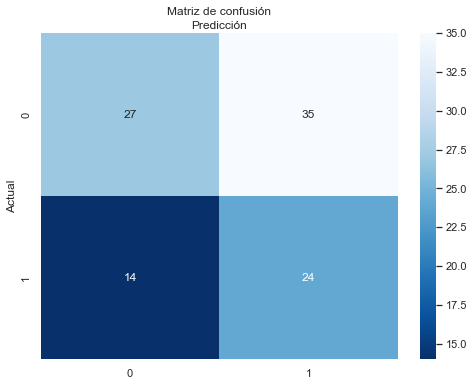

In [50]:
y_predCV = final_modelCV.predict(X_test)
y_predCV = np.round(y_predCV)  # Redondea las predicciones a la clase más cercana (binario)

print("Testing accuracy  test=", accuracy_score(y_test, y_predCV))

metricas(y_test, y_predCV)


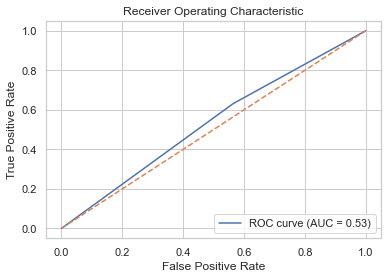

In [51]:
AUC(y_test, y_predCV)

# LSTM

In [52]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [53]:
# Función para crear secuencias
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1, -1])
    return np.array(X), np.array(y)

np.random.seed(42)

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear secuencias para LSTM
n_steps = 3
X_train_seq, y_train_seq = create_sequences(np.hstack((X_train_scaled, y_train.values.reshape(-1,1))), n_steps)
X_test_seq, y_test_seq = create_sequences(np.hstack((X_test_scaled, y_test.values.reshape(-1,1))), n_steps)

# Asegurarse de que las dimensiones sean correctas
y_train_seq = y_train_seq.reshape((y_train_seq.shape[0], 1))
y_test_seq = y_test_seq.reshape((y_test_seq.shape[0], 1))

all_fold_predictions = []

# Dividir los datos en conjuntos de entrenamiento y prueba usando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train_seq):
    X_train_seq_cv, X_test_seq_cv = X_train_seq[train_index], X_train_seq[test_index]
    y_train_seq_cv, y_test_seq_cv = y_train_seq[train_index], y_train_seq[test_index]

    # Crear modelo LSTM con múltiples capas y Dropout
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_seq.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con más épocas
    model.fit(X_train_seq_cv, y_train_seq_cv, epochs=100, verbose=0)

    # Evaluar en conjunto de prueba
    y_pred_proba_cv = model.predict(X_test_seq_cv)
    y_pred_binary_cv = (y_pred_proba_cv > 0.5).astype(int)
    
       # Guardar las predicciones de este fold
    all_fold_predictions.append((y_test_seq_cv, y_pred_proba_cv))

    # Calcular métricas de clasificación para este fold
    accuracy_cv = accuracy_score(y_test_seq_cv, y_pred_binary_cv)
    precision_cv = precision_score(y_test_seq_cv, y_pred_binary_cv)
    recall_cv = recall_score(y_test_seq_cv, y_pred_binary_cv)
    f1_cv = f1_score(y_test_seq_cv, y_pred_binary_cv)
    roc_auc_cv = roc_auc_score(y_test_seq_cv, y_pred_proba_cv)

    # Imprimir métricas
    print("Accuracy:", accuracy_cv)
    print("Precision:", precision_cv)
    print("Recall:", recall_cv)
    print("F1 Score:", f1_cv)
    print("ROC AUC Score:", roc_auc_cv)
    print("--------------")

# Calcular resultados promedio
avg_accuracy = np.mean([accuracy_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_precision = np.mean([precision_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_recall = np.mean([recall_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_f1 = np.mean([f1_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_roc_auc = np.mean([roc_auc_score(true, pred) for true, pred in all_fold_predictions])

# Imprimir resultados promedio
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
print("Average ROC AUC Score:", avg_roc_auc)

3/3 [==============================] - 0s 3ms/step
Accuracy: 0.4823529411764706
Precision: 0.532258064516129
Recall: 0.6875
F1 Score: 0.6
ROC AUC Score: 0.38457207207207206
--------------
3/3 [==============================] - 0s 3ms/step
Accuracy: 0.4823529411764706
Precision: 0.46511627906976744
Recall: 0.4878048780487805
F1 Score: 0.4761904761904762
ROC AUC Score: 0.5077605321507761
--------------
3/3 [==============================] - 0s 2ms/step
Accuracy: 0.6235294117647059
Precision: 0.5333333333333333
Recall: 0.47058823529411764
F1 Score: 0.5
ROC AUC Score: 0.6303344867358708
--------------
3/3 [==============================] - 0s 3ms/step
Accuracy: 0.49411764705882355
Precision: 0.5882352941176471
Recall: 0.40816326530612246
F1 Score: 0.48192771084337355
ROC AUC Score: 0.5306122448979592
--------------
3/3 [==============================] - 0s 3ms/step
Accuracy: 0.49411764705882355
Precision: 0.4634146341463415
Recall: 0.475
F1 Score: 0.4691358024691358
ROC AUC Score: 0.501666